In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from glob import glob

In [2]:
train_path = "fruits-360_dataset/fruits-360/Training/"
test_path = "fruits-360_dataset/fruits-360/Test/"

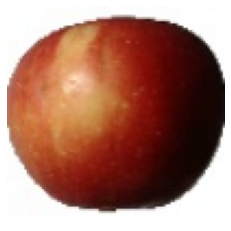

In [4]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [8]:
className = glob(train_path + '/*')
numberofClass = len(className)
print("Number of Classes: ", numberofClass)

Number of Classes:  131


In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(x.shape)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberofClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [14]:
batch_size = 32

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.3,
                                  horizontal_flip=True,
                                  zoom_range=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_path,
                    target_size = x.shape[:2],
                    batch_size=batch_size,
                    color_mode="rgb",
                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
                    test_path,
                    target_size = x.shape[:2],
                    batch_size=batch_size,
                    color_mode="rgb",
                    class_mode="categorical")

hist = model.fit_generator(
            generator= train_generator,
            steps_per_epoch = 1600 // batch_size,
            epochs=100,
            validation_data = test_generator,
            validation_steps = 800 // batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


<ipython-input-18-e04a9012cd56>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/100
50/50 [==============================] - 12s 207ms/step - loss: 4.7626 - accuracy: 0.0406 - val_loss: 4.4838 - val_accuracy: 0.0737
Epoch 2/100
50/50 [==============================] - 10s 205ms/step - loss: 3.8642 - accuracy: 0.1169 - val_loss: 2.9752 - val_accuracy: 0.2725
Epoch 3/100
50/50 [==============================] - 10s 200ms/step - loss: 3.0630 - accuracy: 0.2075 - val_loss: 2.4580 - val_accuracy: 0.3388
Epoch 4/100
50/50 [==============================] - 10s 200ms/step - loss: 2.4099 - accuracy: 0.3369 - val_loss: 1.6218 - val_accuracy: 0.5175
Epoch 5/100
50/50 [==============================] - 10s 206ms/step - loss: 2.0096 - accuracy: 0.4269 - val_loss: 1.4160 - val_accuracy: 0.5675
Epoch 6/100
50/50 [==============================] - 10s 199ms/step - loss: 1.7864 - accuracy: 0.4625 - val_loss: 1.4323 - val_accuracy: 0.5650
Epoch 7/100
50/50 [==============================] - 10s 202ms/step - loss: 1.4772 - accuracy: 0.5450 - val_loss: 1.1134 - val_accuracy:

50/50 [==============================] - 10s 195ms/step - loss: 0.2181 - accuracy: 0.9312 - val_loss: 0.2359 - val_accuracy: 0.9513
Epoch 58/100
50/50 [==============================] - 10s 196ms/step - loss: 0.2152 - accuracy: 0.9425 - val_loss: 0.2124 - val_accuracy: 0.9475
Epoch 59/100
50/50 [==============================] - 10s 192ms/step - loss: 0.1772 - accuracy: 0.9450 - val_loss: 0.4659 - val_accuracy: 0.8938
Epoch 60/100
50/50 [==============================] - 10s 199ms/step - loss: 0.1927 - accuracy: 0.9469 - val_loss: 0.1798 - val_accuracy: 0.9438
Epoch 61/100
50/50 [==============================] - 10s 191ms/step - loss: 0.2293 - accuracy: 0.9425 - val_loss: 0.2423 - val_accuracy: 0.9463
Epoch 62/100
50/50 [==============================] - 10s 192ms/step - loss: 0.1594 - accuracy: 0.9463 - val_loss: 0.2126 - val_accuracy: 0.9638
Epoch 63/100
50/50 [==============================] - 10s 196ms/step - loss: 0.1506 - accuracy: 0.9488 - val_loss: 0.2301 - val_accuracy: 0.951

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


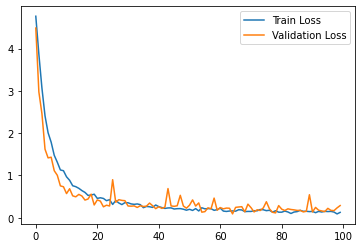

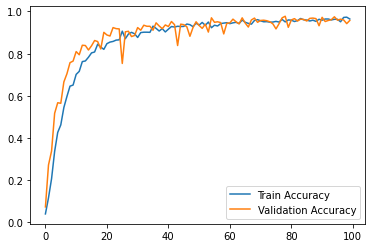

In [21]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"],  label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()